# Creating synthetic spectra

You might want to generate synthetic spectra in order to use them as toy models to test **apollinaire** functionalities. This tutorial presents the basic of synthetic spectra generation and introduce the concept of banana diagrams.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import apollinaire as apn

In [2]:
apn.__version__

'1.3'

We are going to generate our synthetic spectrum by using results obtained from a fit of the Kepler target Saxo. First, let's generate the frequency vector we will use for this work. The considered Nyquist frequency is approximately the Nyquist frequency of Kepler short cadence observations.

In [3]:
freq = np.linspace (0, 8333, 500_000)

Let's read the background parameters and the mode parameters that we are going to use to build our synthetic spectrum.

In [4]:
with apn.peakbagging.get_template_path ("saxo_param_back.txt") as filename :
    param_back = np.loadtxt (filename)[:,0]
with apn.peakbagging.get_template_path ("saxo_pkb.txt") as filename :
    pkb = np.loadtxt (filename)

We are also going to set the splittings and inclination angles values to a given value.

In [5]:
i = 30
nu_s = .4

pkb[:, 11] = i
pkb[:, 14] = nu_s

Now, let's create our synthetic PSD vector (and a noise-free version for comparison) !

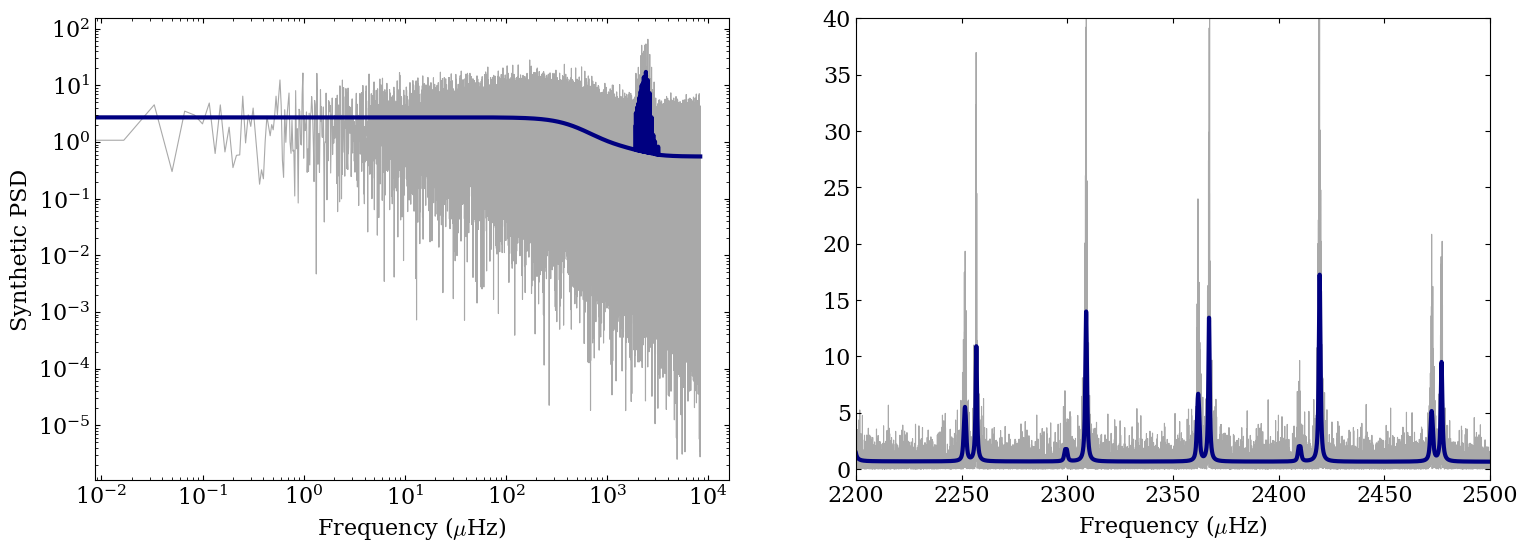

In [6]:
noise_free, entropy = apn.synthetic.create_synthetic_psd (freq, pkb, param_back=param_back, 
                                                         noise_free=True)
psd, entropy = apn.synthetic.create_synthetic_psd (freq, pkb, param_back=param_back, 
                                                  entropy=127138838169534406638366956769226291439)

fig, axs = plt.subplots (1, 2, figsize=(18, 6))
for ax in axs :
    ax.plot (freq, psd, color='darkgrey')
    ax.plot (freq, noise_free, color='navy', lw=3)
    ax.set_xlabel (r'Frequency ($\mu$Hz)')

axs[1].set_xlim (2200, 2500)
axs[1].set_ylim (-1, 40)
axs[0].set_ylabel (r'Synthetic PSD')
axs[0].set_xscale ('log')
axs[0].set_yscale ('log')

Here is a nice synthetic spectrum for which we are going to be able to compute the so-called *banana diagram* (see Ballot et al. 2006 and García & Ballot 2019) ! 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:33<00:00,  1.35s/it]


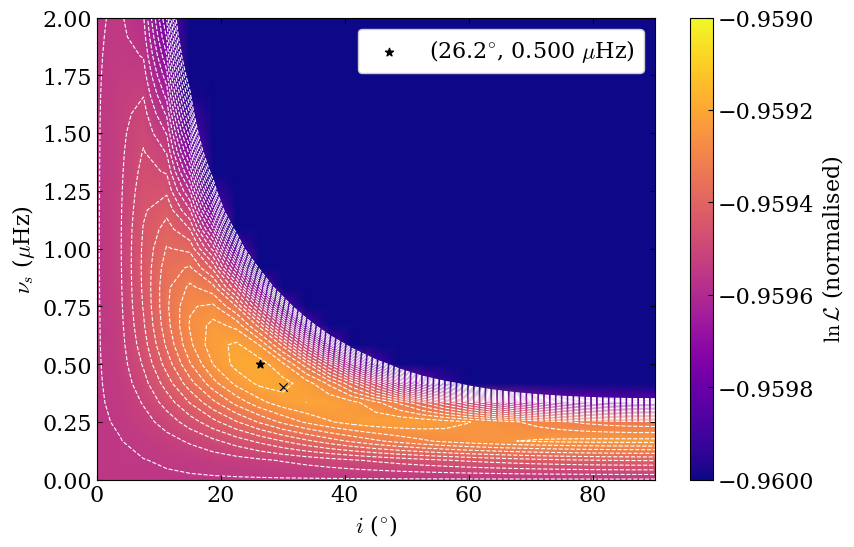

In [7]:
back = apn.peakbagging.build_background (freq, param_back)
grid, fig = apn.peakbagging.banana_diagram (freq, psd, back, pkb, n=25, k=25,
                                      figsize=(9,6), shading='gouraud', marker_color='black', cmap='plasma', 
                                      contour_color='white', marker='*', add_colorbar=True,
                                      vmin=-0.96, vmax=-0.959, levels=np.linspace (-0.96, -0.959, 30))
fig.get_axes ()[0].scatter (i, nu_s, marker='x', color='black')

It is interesting to note that the maximal likelihood is not exactly the same as the splittings/angle couple we considered when creating the synthetic spectrum ! Be careful that inclination angle and rotational splittings are strongly correlated parameters !